In [244]:
def score(y_pred):
    count=0
    for i in range(len(y_pred)):
        if y_pred['Survived'][i]==correct['Survived'][i]:
            count=count+1
    rate=count/(len(y_pred))
    return rate

In [245]:
def score_test(X_test):
    #test
    testid = pd.read_csv("../input/titanic/test.csv")
    y_pred_1=svc.predict_proba(X_test)
    y_pred_2=GBC.predict_proba(X_test)
    y_pred_3=knn.predict_proba(X_test)
    
    y_pred=(y_pred_1*10+y_pred_2*10+y_pred_3*0)/20
    y_test_pred = np.argmax(y_pred, axis=1)
    y_pred1=pd.DataFrame({'PassengerId':testid.PassengerId,'Survived':y_test_pred},index=None)
    
    y_pred=(y_pred_1*10+y_pred_2*0+y_pred_3*10)/20
    y_test_pred = np.argmax(y_pred, axis=1)
    y_pred2=pd.DataFrame({'PassengerId':testid.PassengerId,'Survived':y_test_pred},index=None)
    
    y_pred=(y_pred_1*0+y_pred_2*10+y_pred_3*10)/20
    y_test_pred = np.argmax(y_pred, axis=1)
    y_pred3=pd.DataFrame({'PassengerId':testid.PassengerId,'Survived':y_test_pred},index=None)
    
    y_pred=(y_pred_1*10+y_pred_2*10+y_pred_3*10)/30
    y_test_pred = np.argmax(y_pred, axis=1)
    y_pred4=pd.DataFrame({'PassengerId':testid.PassengerId,'Survived':y_test_pred},index=None)

    y_pred=(y_pred_1*10+y_pred_2*0+y_pred_3*0)/10
    y_test_pred = np.argmax(y_pred, axis=1)
    y_preds=pd.DataFrame({'PassengerId':testid.PassengerId,'Survived':y_test_pred},index=None)
    
    y_pred=(y_pred_1*0+y_pred_2*10+y_pred_3*0)/10
    y_test_pred = np.argmax(y_pred, axis=1)
    y_predg=pd.DataFrame({'PassengerId':testid.PassengerId,'Survived':y_test_pred},index=None)
    
    y_pred=(y_pred_1*0+y_pred_2*0+y_pred_3*10)/10
    y_test_pred = np.argmax(y_pred, axis=1)
    y_predk=pd.DataFrame({'PassengerId':testid.PassengerId,'Survived':y_test_pred},index=None)
    
    #result
    rate1=score(y_pred1)
    rate2=score(y_pred2)
    rate3=score(y_pred3)
    rate4=score(y_pred4)
    rates=score(y_preds)
    rateg=score(y_predg)
    ratek=score(y_predk)

    print (rate1,rate2,rate3,rate4,rates,rateg,ratek)
    return rate1,rate2,rate3,rate4,rates,rateg,ratek

In [246]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.feature_selection import SelectFromModel

import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')
from easydl import clear_output

#Read data
train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')
full=train.append(test,ignore_index=True)

In [247]:
#log Fare
full['Fare']=full['Fare'].map(lambda x: np.log(x) if x>0 else 0)
#nan in Cabin
full['Cabin']=full['Cabin'].fillna('U')
#nan in embarked
full['Embarked']=full['Embarked'].fillna('S')
# Fare, pclass=3&embarked=S&cabin=u
full['Fare']=full['Fare'].fillna(full[(full['Pclass']==3)&(full['Embarked']=='S')&(full['Cabin']=='U')]['Fare'].mean())

In [248]:
#title
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full['Title']=full['Title'].map(TitleDict)

In [249]:
#family
def familysize(familyNum):
    if familyNum==1:
        return 0
    elif (familyNum>=2)&(familyNum<=4):
        return 1
    else:
        return 2
#family size
full['familyNum']=full['Parch']+full['SibSp']+1
full['familySize']=full['familyNum'].map(familysize)

In [250]:
# Deck
full['Deck']=full['Cabin'].map(lambda x:x[0])

In [251]:
# ticket
TickCountDict={}
TickCountDict=full['Ticket'].value_counts()
full['TickCot']=full['Ticket'].map(TickCountDict)
def TickCountGroup(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else :
        return 2
#category in ticket
full['TickGroup']=full['TickCot'].map(TickCountGroup)

In [252]:
# select features
AgePre=full[['Age','Parch','Pclass','SibSp','Title','familyNum','TickCot']]
# one-hot
AgePre=pd.get_dummies(AgePre)
ParAge=pd.get_dummies(AgePre['Parch'],prefix='Parch')
SibAge=pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
PclAge=pd.get_dummies(AgePre['Pclass'],prefix='Pclass')
# check
AgeCorrDf=pd.DataFrame()
AgeCorrDf=AgePre.corr()
AgeCorrDf['Age'].sort_values()
AgePre=pd.concat([AgePre,ParAge,SibAge,PclAge],axis=1)

In [253]:
#split
AgeKnown=AgePre[AgePre['Age'].notnull()]
AgeUnKnown=AgePre[AgePre['Age'].isnull()]

#generate the training set and test set of age
AgeKnown_X=AgeKnown.drop(['Age'],axis=1)
AgeKnown_y=AgeKnown['Age']
AgeUnKnown_X=AgeUnKnown.drop(['Age'],axis=1)

#RF
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(AgeKnown_X,AgeKnown_y)
AgeUnKnown_y=rfr.predict(AgeUnKnown_X)
#full
full.loc[full['Age'].isnull(),['Age']]=AgeUnKnown_y

In [254]:
#name
full['Surname']=full['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict={}
SurNameDict=full['Surname'].value_counts()
full['SurnameNum']=full['Surname'].map(SurNameDict)

# 
MaleDf=full[(full['Sex']=='male')&(full['Age']>12)&(full['familyNum']>=2)]
FemChildDf=full[((full['Sex']=='female')|(full['Age']<=12))&(full['familyNum']>=2)]

# survived/male
MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
MSurNamDf.value_counts()

MSurNamDict={}
MSurNamDict=MSurNamDf[MSurNamDf.values==1].index

# survived/female
FCSurNamDf=FemChildDf['Survived'].groupby(FemChildDf['Surname']).mean()
FCSurNamDf.value_counts()

FCSurNamDict={}
FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index

In [255]:
#adjust
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Age']=5
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(MSurNamDict))&(full['Sex']=='male'),'Sex']='female'


full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Age']=60
full.loc[(full['Survived'].isnull())&(full['Surname'].isin(FCSurNamDict))&((full['Sex']=='female')|(full['Age']<=12)),'Sex']='male'

In [256]:
fullSel=full.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)
#corelation
corrDf=pd.DataFrame()
corrDf=fullSel.corr()
corrDf['Survived'].sort_values(ascending=True)

Pclass       -0.338481
TickGroup    -0.319278
Age          -0.060160
SibSp        -0.035322
familyNum     0.016639
TickCot       0.064962
Parch         0.081629
familySize    0.108631
Fare          0.331805
Survived      1.000000
Name: Survived, dtype: float64

In [258]:
fullSel=fullSel.drop(['familyNum','SibSp','TickCot','Parch'],axis=1)
#one-hot
fullSel=pd.get_dummies(fullSel)
PclassDf=pd.get_dummies(full['Pclass'],prefix='Pclass')
TickGroupDf=pd.get_dummies(full['TickGroup'],prefix='TickGroup')
familySizeDf=pd.get_dummies(full['familySize'],prefix='familySize')

fullSel=pd.concat([fullSel,PclassDf,TickGroupDf,familySizeDf],axis=1)

In [259]:
kfold=StratifiedKFold(n_splits=10)

classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y,
                                      scoring='accuracy',cv=kfold,n_jobs=-1))
    
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    

cvResDf=pd.DataFrame({'cv_mean':cv_means,
                     'cv_std':cv_std,
                     'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                                  'GradientBoostingCla','KNN','LR','LinearDiscrimiAna']})

cvResDf

,cv_mean,cv_std,algorithm
0,0.763296,0.051620,SVC
1,0.777853,0.053897,DecisionTreeCla
2,0.817104,0.037350,RandomForestCla
3,0.794644,0.044788,ExtraTreesCla
4,0.836192,0.042724,GradientBoostingCla
5,0.794657,0.038653,KNN
6,0.828315,0.030782,LR
7,0.823833,0.029460,LinearDiscrimiAna


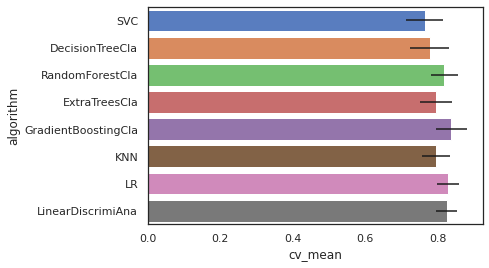

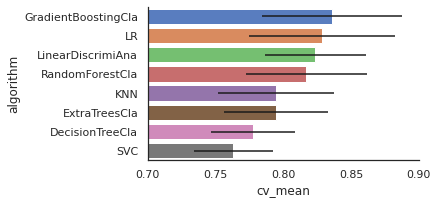

In [260]:
sns.barplot(data=cvResDf,x='cv_mean',y='algorithm',**{'xerr':cv_std})

cvResFacet=sns.FacetGrid(cvResDf.sort_values(by='cv_mean',ascending=False),sharex=False,
            sharey=False,aspect=2)
cvResFacet.map(sns.barplot,'cv_mean','algorithm',**{'xerr':cv_std},
               palette='muted')
cvResFacet.set(xlim=(0.7,0.9))
cvResFacet.add_legend()

In [275]:
experData=fullSel[fullSel['Survived'].notnull()]
preData=fullSel[fullSel['Survived'].isnull()]
X_train=experData.drop('Survived',axis=1)
X_test=preData.drop('Survived',axis=1)
y=experData['Survived']
features=SelectFromModel(RandomForestClassifier(n_estimators=46,min_samples_split=2,
                                                min_samples_leaf=1,max_depth=9 ,random_state=10),
                         max_features=10).fit(X_train, y)

X_train=X_train[X_train.columns[features.get_support()]]
X_test=X_test[X_test.columns[features.get_support()]]

# train A
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y)
svc = SVC(C=10,gamma=0.001,kernel='rbf',probability=True)
svc.fit(X_train,y)
# here, it is not KNN
knn=LogisticRegression()
knn.fit(X_train,y)
rate1,rate2,rate3,rate4,rates,rateg,ratek=score_test(X_test)

0.7894736842105263 0.7942583732057417 0.8038277511961722 0.7918660287081339 0.7870813397129187 0.7870813397129187 0.80622009569378


In [ ]:
# 逻辑回归进行分类，测试集准确率能过0.8，代码整体比较粗糙，很多细节还可以调整～